In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv("fort.200", sep='\\s+', header=None)
df.columns = ['x', 't', 'z']
x = df['x'].values
t = df['t'].values
u = df['z'].values

# Reshape u based on unique x and t values
x_unique = np.unique(x)
t_unique = np.unique(t)
u_reshaped = u.reshape(len(t_unique), len(x_unique))  # Reshape u

# Create meshgrid
X, T = np.meshgrid(x_unique, t_unique)

sample=1

# Subsample to reduce the number of lines in the plot
u_sub = u_reshaped[::sample, :]  # Adjust sampling rate for clarity
T_sub = T[::sample, :]
X_sub = X[::sample, :]


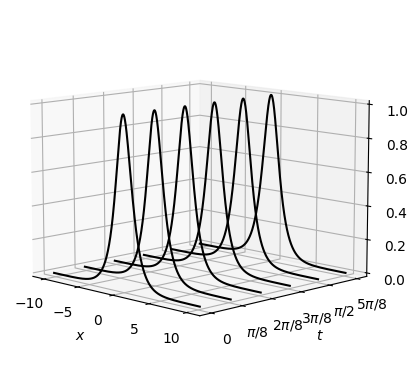

In [4]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot waterfall lines
for i in range(len(T_sub)):
    ax.plot(X_sub[i, :], T_sub[i, :], u_sub[i, :], color='black')

plt.yticks(np.linspace(0, 5*np.pi/8,6), ['0', r'$\pi/8$', r'$2\pi/8$', r'$3\pi/8$', r'$\pi/2$',r'$5\pi/8$'])
# Set labels
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$|u(t,x)|$')

ax.view_init(elev=10, azim=-45)

plt.savefig("NLS1_waterfall.png",dpi=1200)
plt.show()